<a href="https://colab.research.google.com/github/visheshjain392/Music-Recommendation/blob/main/Music_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
!pip install kaggle -q

**Importing the Dependencies**

In [34]:
import os
import json
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

**Data Collection**

In [35]:
kaggle_config = json.load(open('kaggle.json'))

In [36]:
kaggle_config.keys()

dict_keys(['username', 'key'])

In [37]:
# set the environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_config['username']
os.environ['KAGGLE_KEY'] = kaggle_config['key']

In [38]:
# loading the dataset using kaggle api
#!/bin/bash
!kaggle datasets download himabinduatla/spotify-million-song-dataset

Dataset URL: https://www.kaggle.com/datasets/himabinduatla/spotify-million-song-dataset
License(s): CC0-1.0
spotify-million-song-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [39]:
!ls

kaggle.json  spotify-million-song-dataset.zip
sample_data  spotify_millsongdata.csv


In [40]:
with zipfile.ZipFile('spotify-million-song-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [41]:
# loading the dataset to a Pandas dataFrame
df = pd.read_csv('/content/spotify_millsongdata.csv')

**Initial Understanding**

In [42]:
df.shape

(57650, 4)

In [43]:
df.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [45]:
df.isnull().sum()

,0
artist,0
song,0
link,0
text,0


In [46]:
# Top artists and songs
top_artists = df['artist'].value_counts()[:10]
print("/nTop Artists:")
print(top_artists)

/nTop Artists:
artist
Donna Summer        191
Gordon Lightfoot    189
Bob Dylan           188
George Strait       188
Loretta Lynn        187
Alabama             187
Cher                187
Reba Mcentire       187
Chaka Khan          186
Dean Martin         186
Name: count, dtype: int64


In [47]:
df = df.sample(10000)

df = df.drop('link', axis=1).reset_index(drop=True)

In [48]:
# WordCloud for song lyrics
all_lyrics = " ".join(df['text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_lyrics)

In [49]:
df.shape

(10000, 3)

In [50]:
df.head()

,artist,song,text
0,James Taylor,It's Only A Paper Moon,"Say, it's only a paper moon \r\nSailing over ..."
1,Chaka Khan,Got To Be There,"Got to be there, got to be there in the mornin..."
2,Kylie Minogue,Feels So Good,"I realize, realize \r\nI get a little bit wil..."
3,John Legend,Motherless Child,Sometime I feel \r\nLike a motherless child ...
4,Jimmy Buffett,Christmas Island,Lyle Moraine \r\nLet's get away from sleigh b...


WordCloud to visualize the most common words in the lyrics

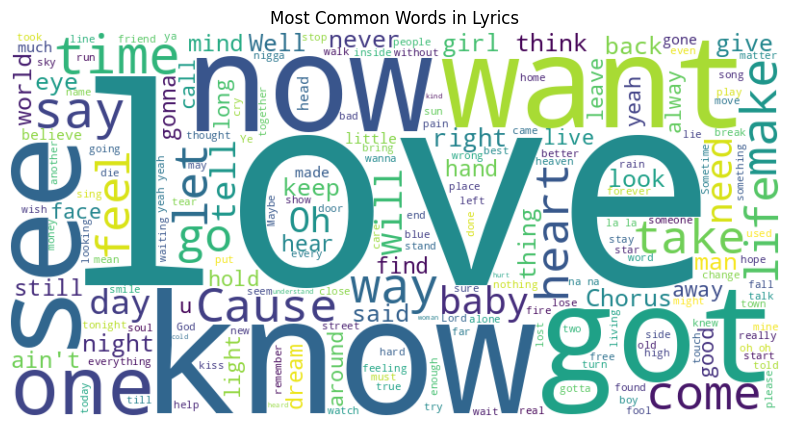

In [51]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Lyrics")
plt.show()

**Data Preprocessing**

In [52]:
# download nltk data
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [53]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

In [56]:
def preprocess_text(text):
  # Remove special characters and numbers
  text = re.sub('[^a-zA-Z]', ' ', text)

  # Convert to lowercase
  text = text.lower()

  # Tokenize the text
  tokens = word_tokenize(text)

  # Remove stopwords
  tokens = word_tokenize(text)
  tokens = [word for word in tokens if word not in stop_words]
  return " ".join(tokens)

In [57]:
# Apply preproccing to lyrics
df['cleaned_test'] = df['text'].apply(preprocess_text)

In [59]:
# Vectorization with TF - IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_test'])

In [60]:
# Computer Cosine Similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [61]:
# Recommendition Function
def recommend_songs(song_name, cosine_sin=cosine_sim, df=df, top_n=5):
  # Find the index of the song
  idx = df[df['song'].str.lower() == song_name.lower()].index
  if len(idx) == 0:
    return "Song not found in the dataset." # can be reworked to compare for songs not present in the dataset
  idx = idx[0]

  # Get similarity scores
  sim_scores = list(enumerate(cosine_sim[idx]))

  # Sort songs based on similarity scores
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
  sim_scores = sim_scores[1:top_n+1]

  # Get song indices
  song_indices = [i[0] for i in sim_scores]

  # Return recommended songs
  return df['song'].iloc[song_indices]

  # Get top N similar songs

In [62]:
df["song"][2]

'Feels So Good'

In [63]:
# Exampple Recommendation
print("\nRecommendations for the song 'Blinded By Rainbows' : ")
recommendations = recommend_songs('Christmas Merories') # df["song"][2]
print(recommendations)


Recommendations for the song 'Blinded By Rainbows' : 
Song not found in the dataset.
